In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")

In [2]:
transactions = pd.read_csv('./dataset/cleaned_dataset/cleaned_transactions.csv')
articles = pd.read_csv('./dataset/cleaned_dataset/cleaned_articles.csv')
customers = pd.read_csv('./dataset/cleaned_dataset/cleaned_customers.csv')

In [3]:
def set_gender_flg(df):
    df['gender'] = 'Unisex'
    df.loc[df['index_group_name'].str.contains('Ladies', na=False), 'gender'] = 'Female'
    df.loc[df['index_group_name'].str.contains('Mens', na=False), 'gender'] = 'Male'
    return df

articles = set_gender_flg(articles)

In [4]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions['YYYY_MM'] = transactions['t_dat'].dt.to_period('M').astype(str)

merged_data = transactions.merge(articles[['article_id', 'product_type_name', 'product_group_name', 'gender']], on='article_id', how='left')
merged_data = merged_data.merge(customers[['customer_id', 'age']], on='customer_id', how='left')

gc.collect()

0

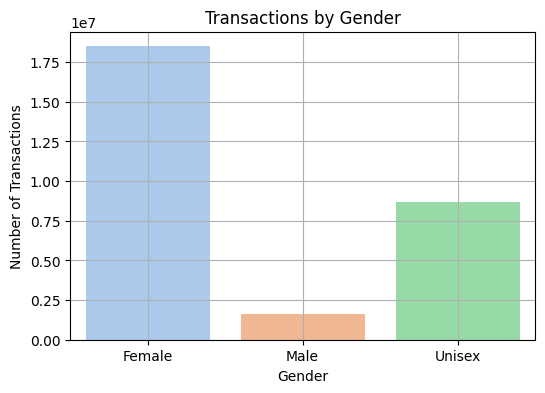

In [5]:
gender_sale = merged_data.groupby('gender').size()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_sale.index, y=gender_sale.values, palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Gender")
plt.grid()
plt.show()

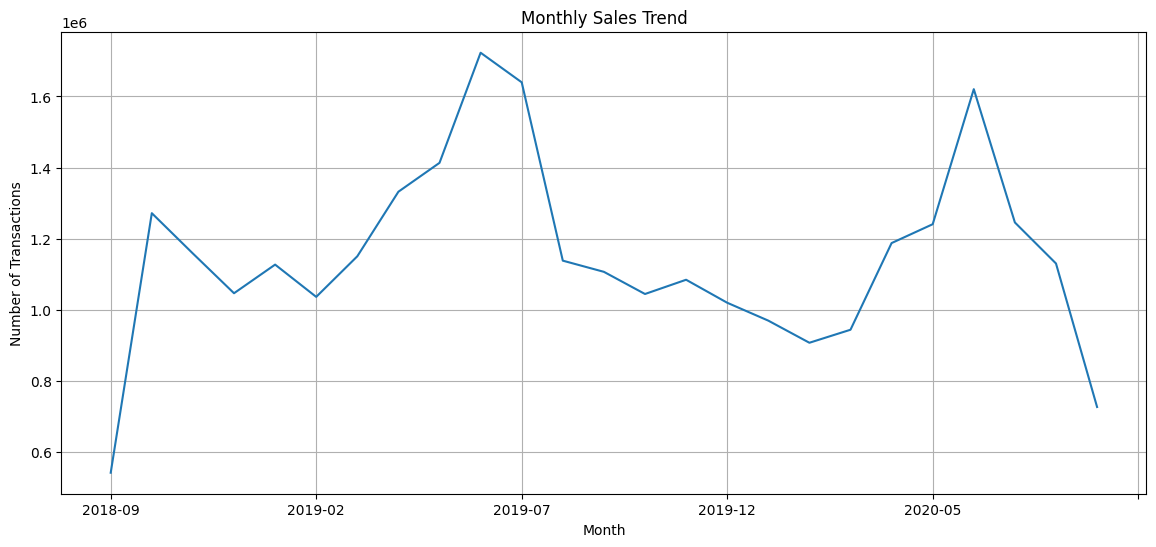

In [6]:
month_sale = merged_data.groupby('YYYY_MM').size()

plt.figure(figsize=(14, 6))
month_sale.plot()
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Monthly Sales Trend")
plt.grid()
plt.show()

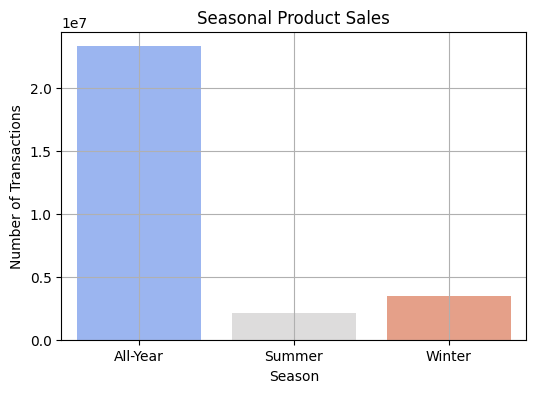

In [7]:
summer_keywords = ['Swimwear', 'Shorts', 'Sandals', 'Summer']
winter_keywords = ['Coat', 'Jacket', 'Boots', 'Winter', 'Sweater']

articles['season'] = 'All-Year'
articles.loc[articles['product_type_name'].str.contains('|'.join(summer_keywords), na=False), 'season'] = 'Summer'
articles.loc[articles['product_type_name'].str.contains('|'.join(winter_keywords), na=False), 'season'] = 'Winter'

seasonal_sales = merged_data.merge(articles[['article_id', 'season']], on='article_id', how='left').groupby('season').size()

plt.figure(figsize=(6, 4))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Number of Transactions")
plt.title("Seasonal Product Sales")
plt.grid()
plt.show()

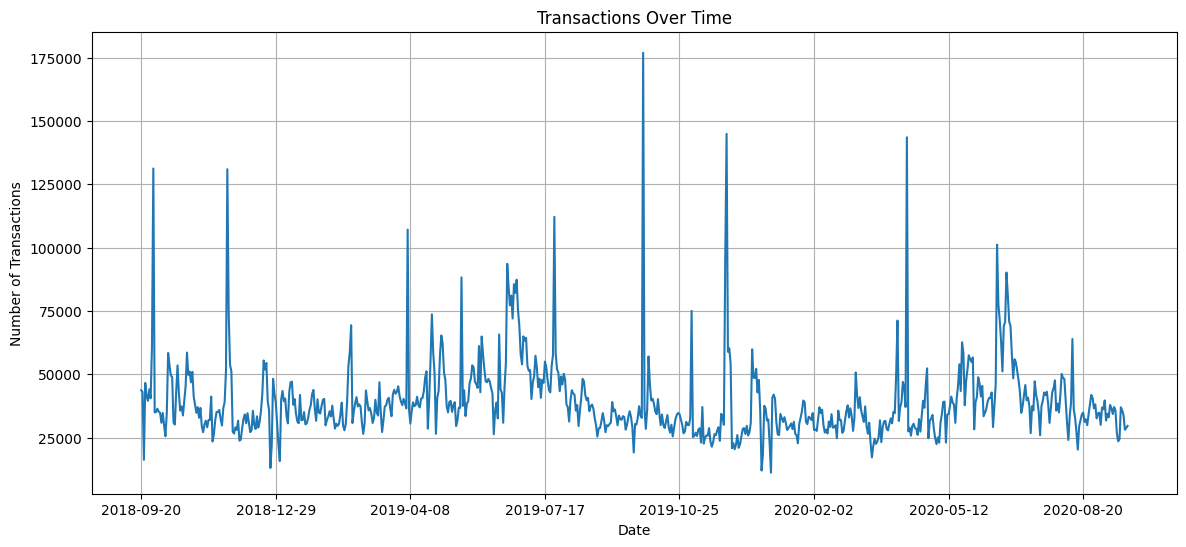

In [3]:
daily_purchases = transactions.groupby('t_dat').size()

plt.figure(figsize=(14, 6))
daily_purchases.plot()
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")
plt.grid()
plt.show()

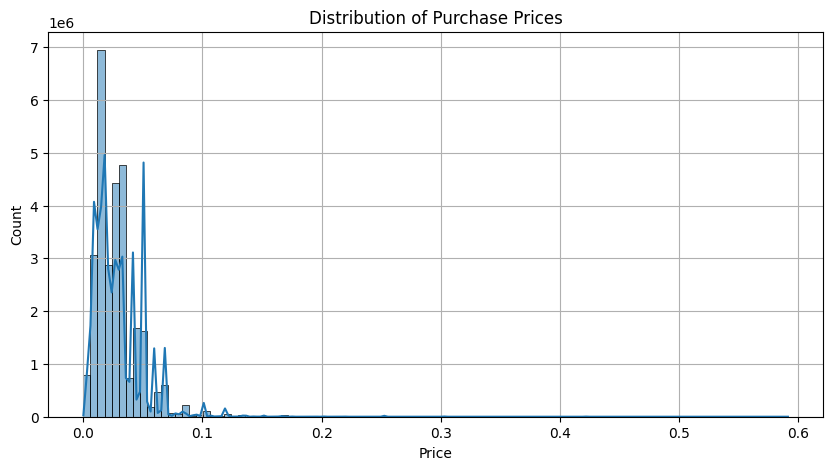

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(transactions['price'], bins=100, kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Purchase Prices")
plt.grid()
plt.show()

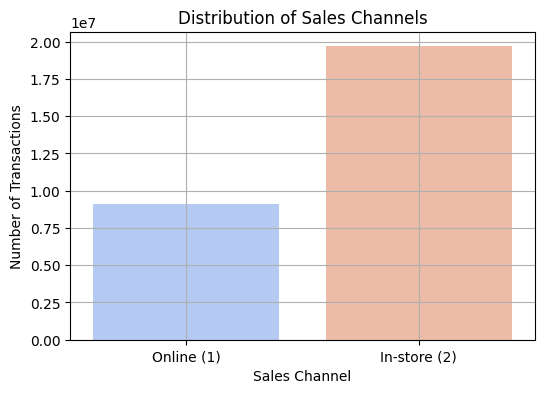

In [5]:
sales_channel_counts = transactions['sales_channel_id'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sales_channel_counts.index, y=sales_channel_counts.values, palette="coolwarm")
plt.xticks([0, 1], ["Online (1)", "In-store (2)"])
plt.xlabel("Sales Channel")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Sales Channels")
plt.grid()
plt.show()

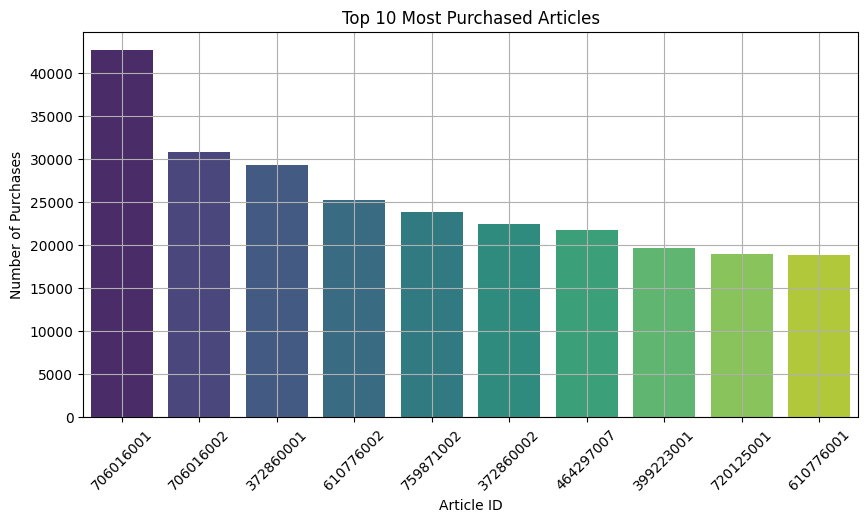

In [6]:
top_articles = transactions['article_id'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_articles.index.astype(str), y=top_articles.values, palette="viridis")
plt.xlabel("Article ID")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Articles")
plt.xticks(rotation=45)
plt.grid()
plt.show()

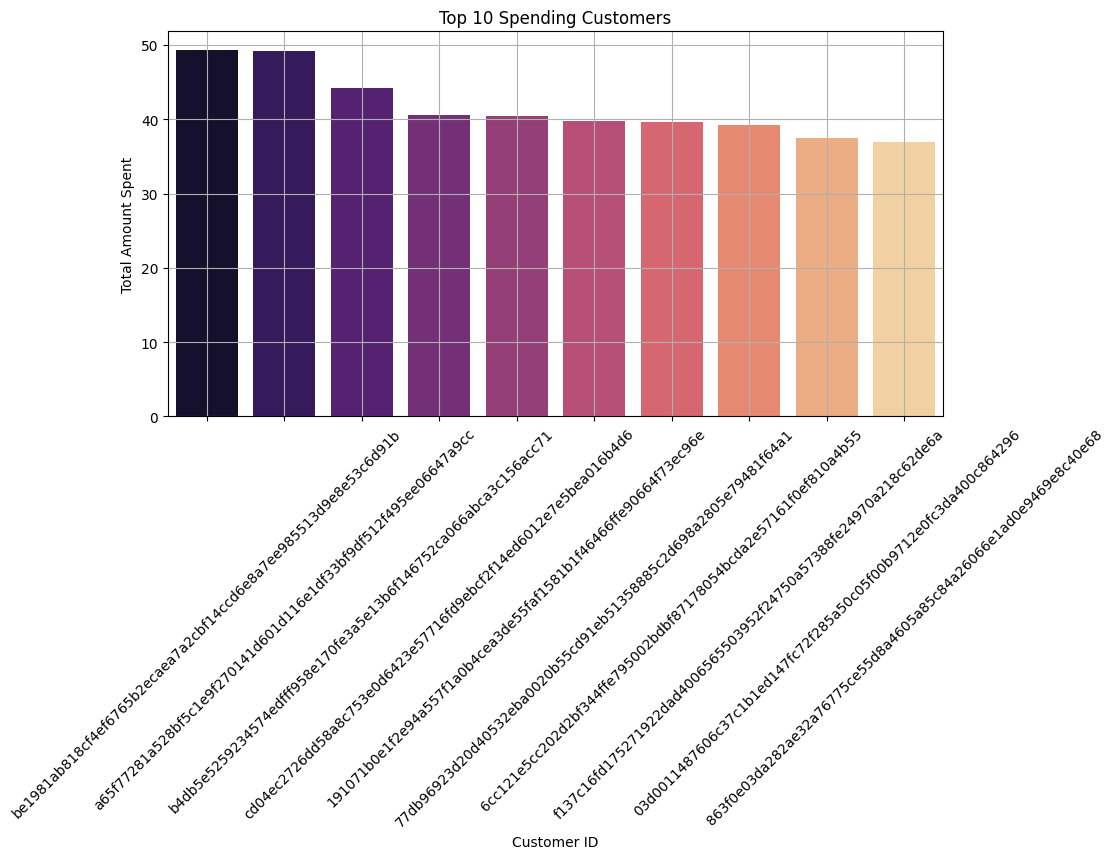

In [7]:
top_customers = transactions.groupby('customer_id')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="magma")
plt.xlabel("Customer ID")
plt.ylabel("Total Amount Spent")
plt.title("Top 10 Spending Customers")
plt.xticks(rotation=45)
plt.grid()
plt.show()

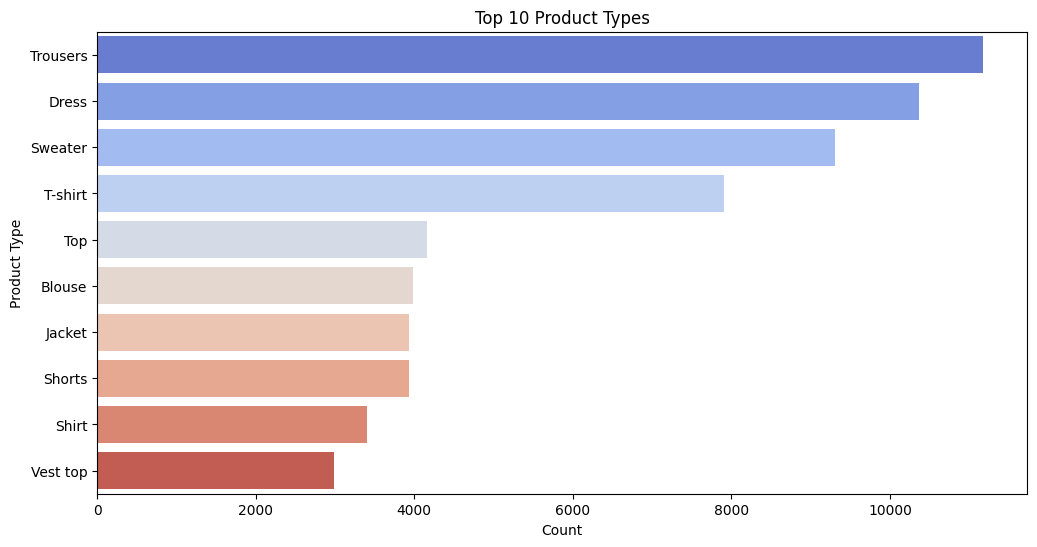

In [8]:
plt.figure(figsize=(12, 6))

top_product_types = articles['product_type_name'].value_counts().head(10)
sns.barplot(x=top_product_types.values, y=top_product_types.index, palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.title("Top 10 Product Types")
plt.show()

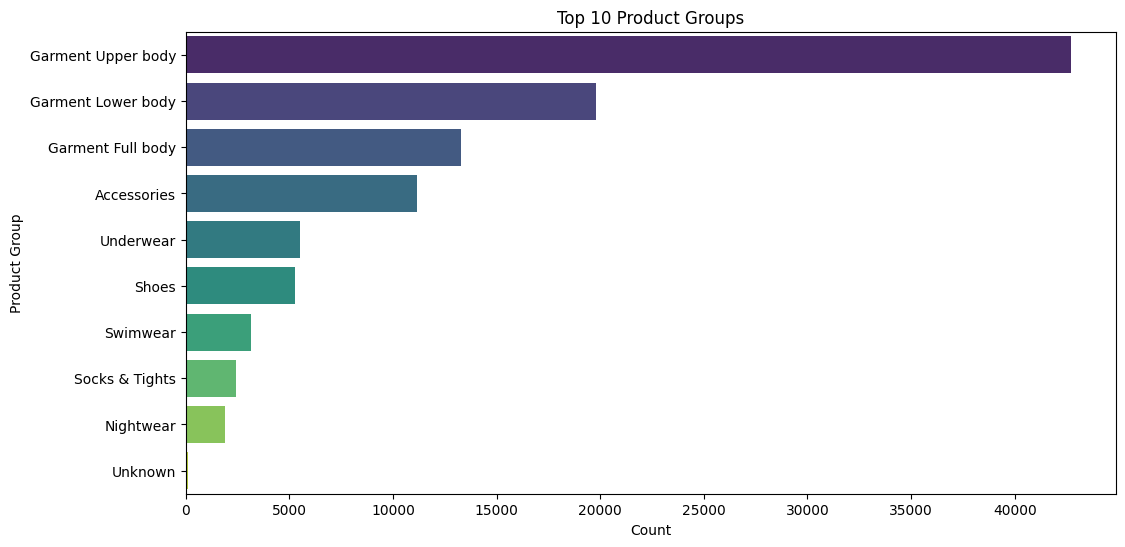

In [9]:
plt.figure(figsize=(12, 6))

top_product_groups = articles['product_group_name'].value_counts().head(10)
sns.barplot(x=top_product_groups.values, y=top_product_groups.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Product Group")
plt.title("Top 10 Product Groups")
plt.show()

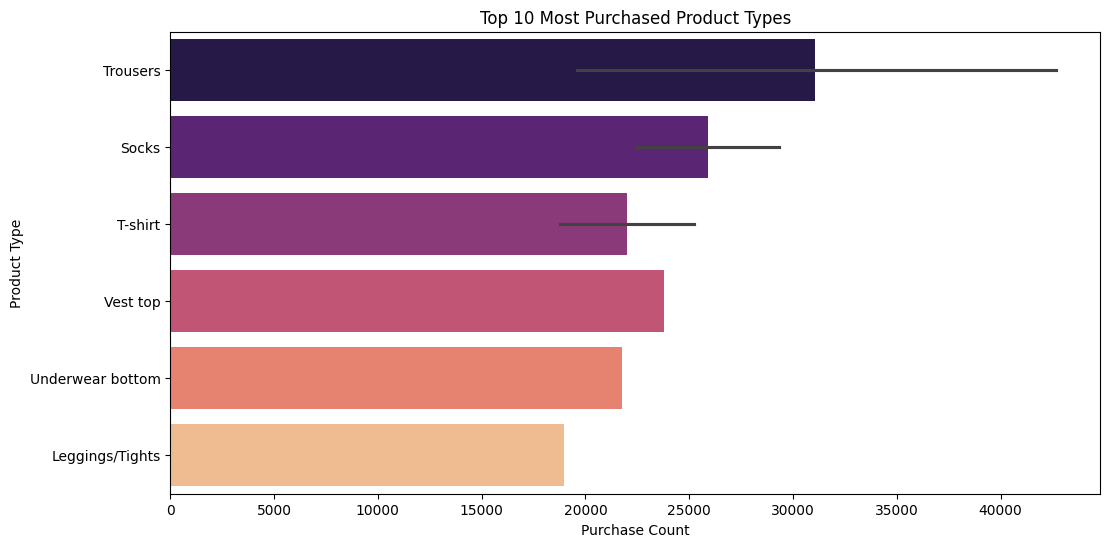

In [10]:
popular_products = transactions['article_id'].value_counts().reset_index()
popular_products.columns = ['article_id', 'purchase_count']
popular_products = popular_products.merge(articles[['article_id', 'product_type_name', 'product_group_name']], on='article_id', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_products['purchase_count'][:10], y=popular_products['product_type_name'][:10], palette='magma')
plt.xlabel("Purchase Count")
plt.ylabel("Product Type")
plt.title("Top 10 Most Purchased Product Types")
plt.show()

In [11]:
underrepresented_products = articles[articles['purchase_count'] < 5]

print("Underrepresented Products (Less than 5 Purchases):")
print(underrepresented_products[['article_id', 'product_type_name', 'purchase_count']].head(10))

Underrepresented Products (Less than 5 Purchases):
    article_id         product_type_name  purchase_count
11   112679048                   Sweater             3.0
12   112679052                   Sweater             3.0
20   118458034                  Trousers             3.0
31   126589011                 Hair clip             2.0
32   126589012                 Hair clip             1.0
37   141661022  Pyjama jumpsuit/playsuit             2.0
38   141661025  Pyjama jumpsuit/playsuit             1.0
48   146706005                  Bodysuit             2.0
71   156610007                  Trousers             1.0
76   160442042                     Socks             2.0


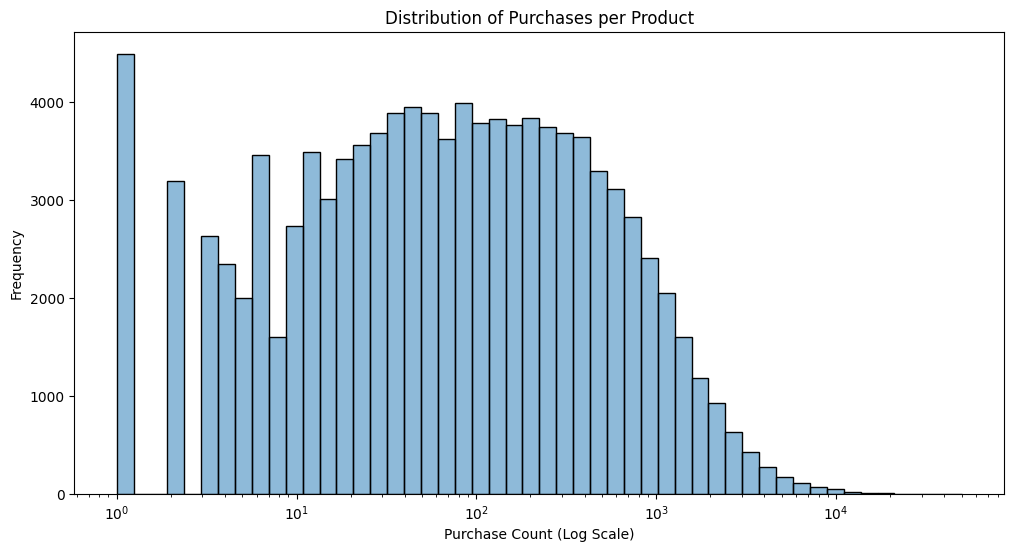

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(articles['purchase_count'], bins=50, kde=True, log_scale=True)
plt.xlabel("Purchase Count (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Purchases per Product")
plt.show()

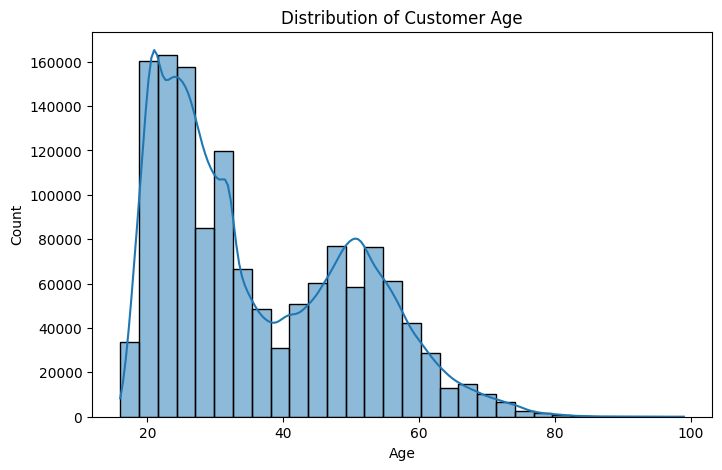

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(customers['age'], bins=30, kde=True)
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

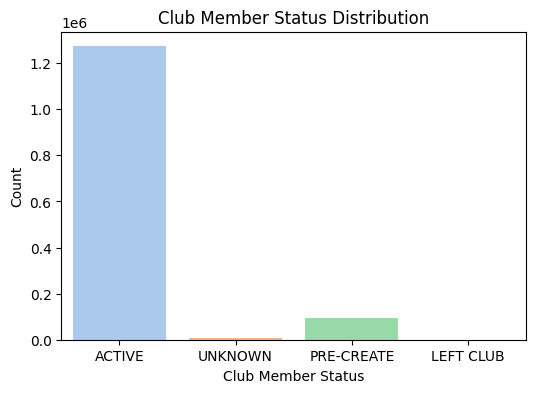

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=customers['club_member_status'], palette='pastel')
plt.title("Club Member Status Distribution")
plt.xlabel("Club Member Status")
plt.ylabel("Count")
plt.show()

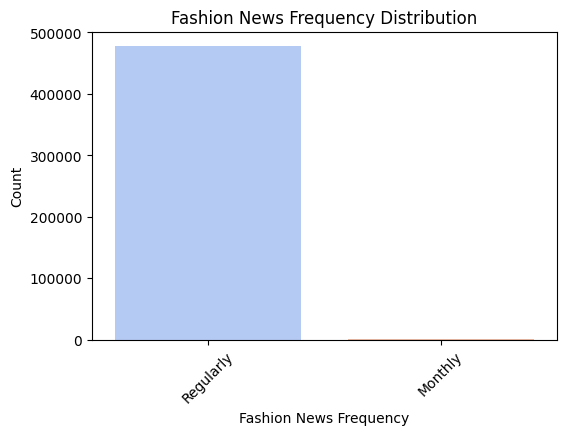

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=customers['fashion_news_frequency'], palette='coolwarm')
plt.title("Fashion News Frequency Distribution")
plt.xlabel("Fashion News Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

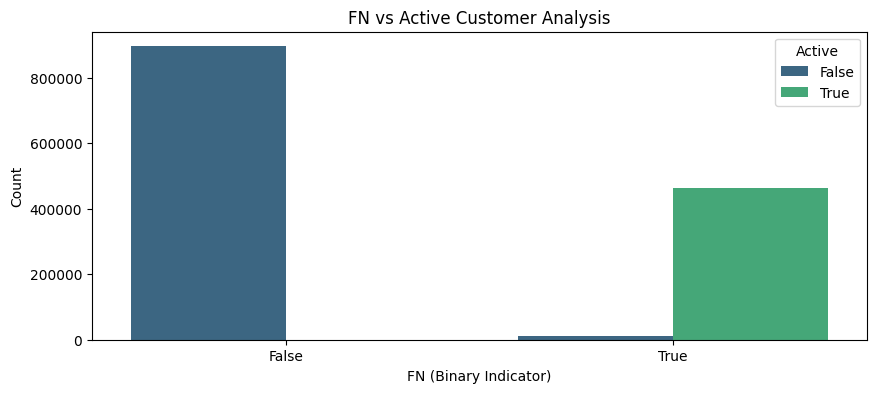

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(data=customers, x='FN', hue='Active', palette='viridis')
plt.title("FN vs Active Customer Analysis")
plt.xlabel("FN (Binary Indicator)")
plt.ylabel("Count")
plt.show()

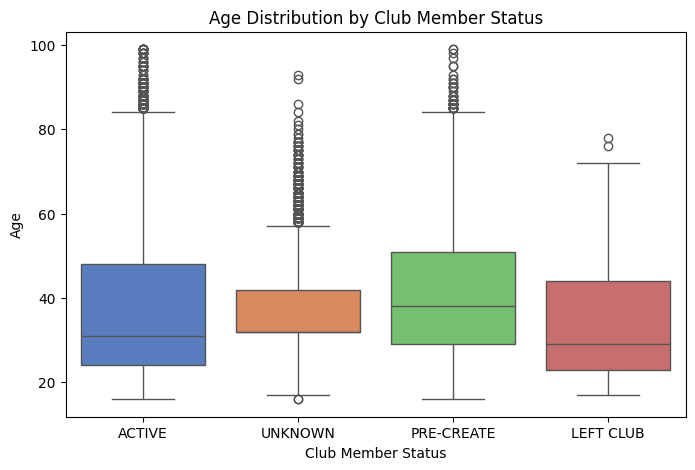

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='club_member_status', y='age', data=customers, palette='muted')
plt.title("Age Distribution by Club Member Status")
plt.xlabel("Club Member Status")
plt.ylabel("Age")
plt.show()

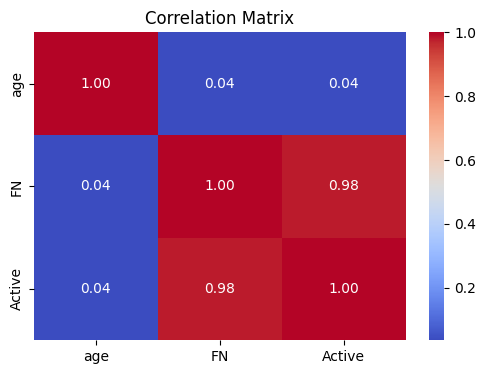

In [19]:
corr_matrix = customers[['age', 'FN', 'Active']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()